In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline

#### Load CSV files

In [2]:
covid_df = pd.read_csv('COVID_CountByZipPerDate 03292021.csv')
vaccine_df = pd.read_csv('vaccine_with_protocol.csv')

#### Convert Values

In [3]:
covid_df.Zip = covid_df.Zip.astype('Int64')
vaccine_df.zipcode = vaccine_df.zipcode.astype('Int64')
vaccine_df.count_given = vaccine_df.count_given.astype('float')
vaccine_df.dose_nbr = vaccine_df.dose_nbr.astype('Int64')

In [4]:
covid_df.Zip = covid_df.Zip.astype('str')
vaccine_df.zipcode = vaccine_df.zipcode.astype('str')

#### Rename Columns

In [5]:
covid_df.columns = ['date', 'zip', 'cases']
vaccine_df.columns = ['date', 'zip', 'vacc', 'dose_nbr', 'protocol']

#### Convert DateTime

In [6]:
covid_df.date = pd.to_datetime(covid_df.date)
vaccine_df.date = pd.to_datetime(vaccine_df.date)

#### Filter Out Second Vaccine Doses

In [7]:
vaccine_df = vaccine_df[vaccine_df['dose_nbr'] == 1].reset_index()

In [8]:
# vaccine_df

#### Group Total Covid and Total Vaccine Count By Zip

#group by zipcode to get total cases per zipcode
df2 = C_count.groupby(['Zip'],as_index=False)['Cases'].sum()
df2

In [9]:
covid_df_g = covid_df.groupby(['zip'], as_index=False)['cases'].sum()
vaccine_df_g = vaccine_df.groupby(['zip'], as_index=False)['vacc'].sum()

In [10]:
covid_df_g.cases.sum()

93619

In [11]:
vaccine_df_g.vacc.sum()

220038.0

#### Merging Covid By Zip and Vaccine By Zip

In [12]:
c_v_zip = pd.merge(covid_df_g, vaccine_df_g, how='inner', on='zip')

In [13]:
c_v_zip

,zip,cases,vacc
0,37013,13354,18465.0
1,37027,231,352.0
2,37069,16,50.0
3,37072,2984,8460.0
4,37076,4279,11113.0
5,37080,574,1970.0
6,37115,4574,8520.0
7,37138,2359,7152.0
8,37189,479,1056.0
9,37201,299,576.0


#### Load Ethnicity Data

In [14]:
ethnicity_df = pd.read_excel("ethnicity.xlsx", skiprows = 1, header=[0,1], sheet_name=0)
ethnicity_df = ethnicity_df[ethnicity_df.columns.drop(list(ethnicity_df.filter(regex='Error')))]
ethnicity_df.columns = ethnicity_df.columns.droplevel(1)

In [15]:
ethnicity_df_clean = ethnicity_df.set_index('Unnamed: 0_level_0').T.reset_index().rename({'index' : 'zip'}, axis=1)

#### Total Population From Ethnicity DF

In [16]:
pop_by_zip = ethnicity_df_clean[['zip', 'Total:']]
pop_by_zip = pop_by_zip.rename(columns={'Total:': 'total'})

#### Merge COVID/Vaccine DF to Ethnicity DF

In [41]:
c_v_pop_zip = pd.merge(c_v_zip, pop_by_zip, how='inner', on='zip')
c_v_pop_zip.rename(columns = {'total': 'pop_total'}, inplace = True)
c_v_pop_zip['perc_cases'] = round(c_v_pop_zip.cases / c_v_pop_zip.pop_total * 100, 2)
c_v_pop_zip['perc_vacc'] = round(c_v_pop_zip.vacc / c_v_pop_zip.pop_total * 100, 2)
c_v_pop_zip['perc_of_pop'] = round(c_v_pop_zip.pop_total / c_v_pop_zip.pop_total.sum() * 100,2)
c_v_pop_zip['perc_cases_by_pop'] = round(c_v_pop_zip.cases / c_v_pop_zip.pop_total.sum() * 100,2)
c_v_pop_zip['perc_vaccines_by_pop'] = round(c_v_pop_zip.vacc / c_v_pop_zip.pop_total.sum() * 100,2)

In [42]:
c_v_zip

,zip,cases,vacc
0,37013,13354,18465.0
1,37027,231,352.0
2,37069,16,50.0
3,37072,2984,8460.0
4,37076,4279,11113.0
5,37080,574,1970.0
6,37115,4574,8520.0
7,37138,2359,7152.0
8,37189,479,1056.0
9,37201,299,576.0


In [43]:
pop_by_zip.shape

(118, 2)

In [44]:
c_v_pop_zip.shape

(30, 9)

#### Highest Population Percentage by Zip

In [45]:
c_v_pop_zip.sort_values('perc_of_pop', ascending=False, inplace=False).head(7)

,zip,cases,vacc,pop_total,perc_cases,perc_vacc,perc_of_pop,perc_cases_by_pop,perc_vaccines_by_pop
0,37013,13354,18465.0,97939,13.64,18.85,12.55,1.71,2.37
18,37211,10233,19175.0,75955,13.47,25.25,9.73,1.31,2.46
1,37027,231,352.0,56117,0.41,0.63,7.19,0.03,0.05
28,37221,3910,17222.0,41017,9.53,41.99,5.25,0.50,2.21
6,37115,4574,8520.0,40343,11.34,21.12,5.17,0.59,1.09
4,37076,4279,11113.0,40161,10.65,27.67,5.14,0.55,1.42
14,37207,4729,9255.0,39544,11.96,23.40,5.07,0.61,1.19


#### Highest Percentage of Cases By Zip

In [46]:
c_v_pop_zip.sort_values('perc_cases', ascending=False, inplace=False).head(7)

,zip,cases,vacc,pop_total,perc_cases,perc_vacc,perc_of_pop,perc_cases_by_pop,perc_vaccines_by_pop
20,37213,65,72.0,95,68.42,75.79,0.01,0.01,0.01
26,37219,270,638.0,1154,23.40,55.29,0.15,0.03,0.08
10,37203,3346,8029.0,15091,22.17,53.20,1.93,0.43,1.03
29,37228,310,655.0,1615,19.20,40.56,0.21,0.04,0.08
9,37201,299,576.0,1619,18.47,35.58,0.21,0.04,0.07
0,37013,13354,18465.0,97939,13.64,18.85,12.55,1.71,2.37
15,37208,2428,5526.0,18011,13.48,30.68,2.31,0.31,0.71


#### Load geospatial zips

In [48]:
zipcodes = gpd.read_file('zipcodes.geojson')
print(zipcodes.crs)
# zipcodes

epsg:4326


In [49]:
zipcodes.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


#### Merge Grouped DataFrames With Zips


In [50]:
vac_geo = zipcodes.merge(vaccine_df_g, how="inner", left_on='zip', right_on='zip')
covid_geo = zipcodes.merge(covid_df_g, how="inner", left_on='zip', right_on='zip')
c_v_geo = pd.merge(zipcodes, c_v_pop_zip, how="inner", on='zip')

In [51]:
vac_geo = vac_geo[['zip', 'shape_stlength', 'shape_starea', 'geometry', 'vacc']]

In [52]:
c_v_geo.sort_values('perc_of_pop', ascending=False, inplace=False)

,zip,objectid,po_name,shape_stlength,shape_starea,geometry,cases,vacc,pop_total,perc_cases,perc_vacc,perc_of_pop,perc_cases_by_pop,perc_vaccines_by_pop
40,37013,34,ANTIOCH,349164.88029162859,1150567551.5894165,"MULTIPOLYGON (((-86.66517 36.09108, -86.66526 ...",13354,18465.0,97939,13.64,18.85,12.55,1.71,2.37
39,37211,39,NASHVILLE,290587.58467925159,602215091.79736328,"MULTIPOLYGON (((-86.75696 36.13189, -86.75693 ...",10233,19175.0,75955,13.47,25.25,9.73,1.31,2.46
11,37027,43,BRENTWOOD,1235.5221063389981,38954.521423339844,"MULTIPOLYGON (((-86.73108 36.00985, -86.73153 ...",231,352.0,56117,0.41,0.63,7.19,0.03,0.05
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...",231,352.0,56117,0.41,0.63,7.19,0.03,0.05
4,37027,31,BRENTWOOD,3116.4327152718852,304596.06201171875,"MULTIPOLYGON (((-86.72012 36.00886, -86.72012 ...",231,352.0,56117,0.41,0.63,7.19,0.03,0.05
5,37027,30,BRENTWOOD,30401.649619169264,24460979.921020508,"MULTIPOLYGON (((-86.68705 36.01059, -86.68695 ...",231,352.0,56117,0.41,0.63,7.19,0.03,0.05
6,37027,29,BRENTWOOD,524.2364158788497,5803.0636596679687,"MULTIPOLYGON (((-86.72541 36.00934, -86.72540 ...",231,352.0,56117,0.41,0.63,7.19,0.03,0.05
7,37027,28,BRENTWOOD,3028.3872771754991,553384.08331298828,"MULTIPOLYGON (((-86.68475 35.99279, -86.68488 ...",231,352.0,56117,0.41,0.63,7.19,0.03,0.05
8,37027,27,BRENTWOOD,1678.1723515222479,156012.904296875,"MULTIPOLYGON (((-86.68367 35.99140, -86.68419 ...",231,352.0,56117,0.41,0.63,7.19,0.03,0.05
9,37027,44,BRENTWOOD,1315.615824819155,78289.863037109375,"MULTIPOLYGON (((-86.67793 35.98782, -86.67941 ...",231,352.0,56117,0.41,0.63,7.19,0.03,0.05


In [53]:
# covid_zip.info()

In [54]:
# covid_zip.plot();

In [55]:
# vac_zip.plot();

#### COVID Map

In [56]:
# fig, ax = plt.subplots(figsize=(30,10))
# covid_geo.plot(column = 'cases',
#              cmap = 'GnBu', 
#              edgecolor = 'black',
#              ax = ax, 
#              legend=True)
# ax.axis('off');

#### Vaccine Map

In [57]:
# fig, ax = plt.subplots(figsize=(30,10))
# vac_geo.plot(column = 'vacc',
#              cmap = 'GnBu', 
#              edgecolor = 'black',
#              ax = ax, 
#              legend=True)
# ax.axis('off');

#### COVID AND Vaccine Map

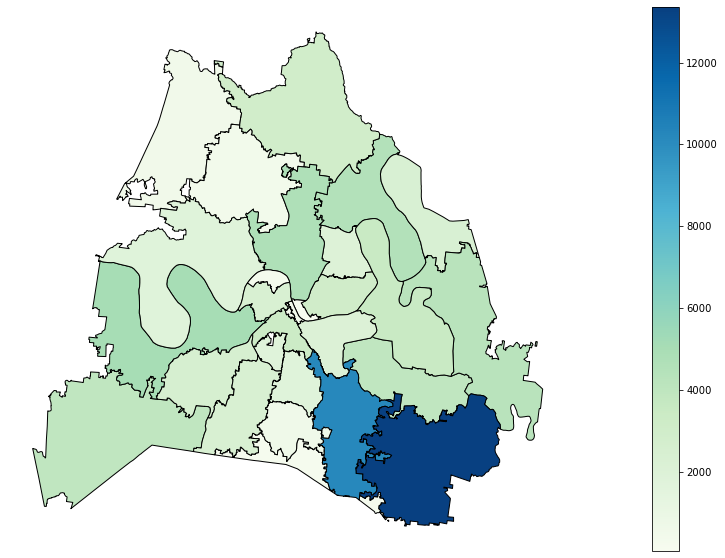

In [60]:
fig, ax = plt.subplots(figsize=(30,10))
c_v_geo.plot(column = 'cases',
             cmap = 'GnBu', 
             edgecolor = 'black',
             ax = ax, 
             legend=True)
ax.axis('off');